## 3. Collect Evidence

In the third phase of SDMT, we collect _evidence_ to attest to the fact that the model realized the QA categories specified in the previous phase.

We already defined `Measurement`s in the `TestSuite` specification to generate this evidence. Each individual piece of data is an `Evidence`. Once `Evidence`s are produced, we can persist them to an _artifact store_ to maintain our evidence across sessions. 

#### Initialize MLTE Context

MLTE contains a global context that manages the currently active _session_. Initializing the context tells MLTE how to store all of the artifacts that it produces.

In [1]:
import os

from mlte.session import set_context, set_store

store_path = os.path.join(os.getcwd(), "store")
os.makedirs(store_path, exist_ok=True)

set_context("IrisClassifier", "0.0.1")
set_store(f"local://{store_path}")

Creating initial custom lists at URI: local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/simple/store
Loaded 8 qa_categories for initial list
Loaded 14 quality_attributes for initial list


We now prepare our model to run our tests. This is done only once, to create and run the model, and have the data ready for running the tests. This information could also be loaded from a previous model run instead.

In [2]:
from demo.simple import measurements

# Define command that can be used to run the model in training mode.
model_train_command = measurements.TRAIN_CMD

# First set up and store the sample model, and run a prediction on our default input data.
model_path = measurements.create_model()
y_test, y_pred = measurements.predict(model_path)

We now load the `TestSuite`, set up the inputs for each `TestCase`, and run all measurements on all `TestCases` with the corresponding inputs. The resulting `Evidence` is then stored.

> accuracy.evidence: 1.0
> confusion matrix.evidence: [[10  0  0],  [ 0 13  0],  [ 0  0  7]]
> class distribution.evidence: Image size: 14686
> model size.evidence: 2.471 kilobyte
> training memory.evidence: Average: 85.684 megabyte
Minimum: 0.032 megabyte
Maximum: 154.32 megabyte
> training cpu.evidence: Average: 1.52 percent
Minimum: 0.00 percent
Maximum: 3.56 percent


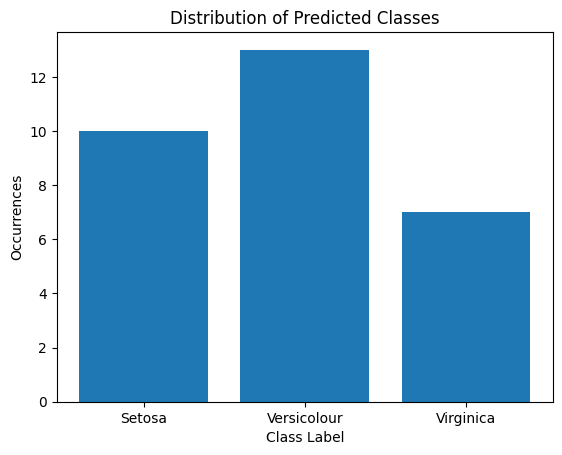

In [3]:
from typing import Any

from mlte.measurement.units import Units
from mlte.tests.test_suite import TestSuite

# Define test case inputs.
test_inputs: dict[str, list[Any]] = {
    "accuracy": [y_test, y_pred],
    "confusion matrix": [y_test, y_pred],
    "class distribution": [y_pred],
    "model size": [model_path, Units.kilobyte],
    "training memory": [model_train_command, Units.megabyte],
    "training cpu": [model_train_command],
}

# Load the TestSuite, and run measurements on all cases with the given inputs.
test_suite = TestSuite.load()
evidences = test_suite.run_measurements(test_inputs)

# Save all evidence to the store.
for evidence in evidences:
    print(f"> {evidence.identifier}: {evidence}")
    evidence.save(force=True)